# Определение перспективного тарифа для телеком-компании

**«Мегалайн»** — федеральый оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Проанализируем поведение клиентов и сделем вывод — какой тариф лучше.

 **Описание тарифов**
 
 **Тариф «Смарт»**
-  Ежемесячная плата: 550 рублей
-  Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
-  Стоимость услуг сверх тарифного пакета:
-  минута разговора: 3 рубля
-  сообщение: 3 рубля
-  1 Гб интернет-трафика: 200 рублей

 **Тариф «Ультра»**
-  Ежемесячная плата: 1950 рублей
-  Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
-  Стоимость услуг сверх тарифного пакета:
-  минута разговора: 1 рубль
-  сообщение: 1 рубль
-  1 Гб интернет-трафика: 150 рублей

**Примечание:**

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

## Изучение данных из файла

Откройем файл с данными и изучим общую информацию.

Путь к файлам:

-  /datasets/calls.csv 
-  /datasets/internet.csv 
-  /datasets/messages.csv 
-  /datasets/tariffs.csv 
-  /datasets/users.csv

О качестве данных ничего не известно. Поэтому перед проверкой понадобится обзор данных.
Проверяем данные на ошибки и оцениваем их влияние на исследование. 
Затем, на этапе изучения и подготовки данных ищем возможность исправить самые критичные ошибки данных.

Таким образом, исследование пройдёт в **пять этапов**:

- Изучение даннх
- Подготовка данных
- Анализ данных
- Проверка гипотез
- Общий вывод

Исследование:

In [1]:
import pandas as pd # импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
calls = pd.read_csv('/datasets/calls.csv') # чтение файла с данными и сохранение  
internet = pd.read_csv('/datasets/internet.csv')    
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')         

### Таблица calls (информация о звонках)


Таблица calls (информация о звонках):
    
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок


In [3]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [5]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


**Вывод:** 

- дата не в правильном формате object
- длительность звонка в минутах обозначен в минутах и секундах, а по условиям «Мегалайн» всегда округляет секунды до минут, а 0 звонки  считаются за звонок.

In [6]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format="%Y-%m-%d") # приводим к типу даты дату звонка

In [7]:
calls['duration'] = np.ceil(calls['duration']).astype('int') # приводим к целым числам длительность звонка

In [8]:
calls['duration'] = calls['duration'].replace(0, 1) # 0 звонки меняем на 1 - минутные.

Проверяем что получилось:

In [9]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,1,1000
1,1000_1,2018-08-17,1,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


In [10]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


### Таблица internet (информация об интернет-сессиях)

Таблица internet (информация об интернет-сессиях):
    
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

In [11]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [12]:
internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [13]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


**Вывод:**
- у уникального номера сессии не правильный формат object
- дата не в правильном формате object

In [14]:
internet['id'] = internet['id'].astype('int') # изменяем тип данных уникального номера сессии

In [15]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format="%Y-%m-%d")  # приводим к типу даты дату интернет-сессии

Проверяем что получилось:

In [16]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,10000,112.95,2018-11-25,1000
1,1,10001,1052.81,2018-09-07,1000
2,2,10002,1197.26,2018-06-25,1000
3,3,10003,550.27,2018-08-22,1000
4,4,10004,302.56,2018-09-24,1000


In [17]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  int64         
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 5.7 MB


### Таблица messages (информация о сообщениях)

Таблица messages (информация о сообщениях):
    
- id — уникальный номер сообщения
- message_date — дата сообщения
- ser_id — идентификатор пользователя, отправившего сообщение

In [18]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [19]:
messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


In [20]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


**Вывод:**
- у уникального номера сообщения не правильный формат object
- дата не в правильном формате object

In [21]:
messages['id'] = messages['id'].astype('int')  # изменяем тип данных уникального номера сообщения

In [22]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format="%Y-%m-%d")  # приводим к типу даты дату сообщения

Проверяем что получилось:

In [23]:
messages.head()

,id,message_date,user_id
0,10000,2018-06-27,1000
1,10001,2018-10-08,1000
2,10002,2018-08-04,1000
3,10003,2018-06-16,1000
4,10004,2018-12-05,1000


In [24]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  int64         
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.8 MB


### Таблица tariffs (информация о тарифах)

Таблица tariffs (информация о тарифах):
    
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)


In [25]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [26]:
tariffs.describe()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


In [27]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


**Вывод:**
- изменим название тарифа колонки tariff_name

In [28]:
tariffs = tariffs.rename(columns={'tariff_name': 'tariff'}) #для переименования столбцов вызывают метод датафреймов rename(). 

### Таблица users (информация о пользователях)

Таблица users (информация о пользователях):

- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- ast_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tarif — название тарифного плана

In [29]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [30]:
users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [31]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


**Вывод:**
- у уникального номера сообщения не правильный формат object
- дата не в правильном формате object
- 38 пользователей прекратили пользоваться тарифом

In [32]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format="%Y-%m-%d") # приводим к типу даты дату прекращения пользования тарифом

In [33]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format="%Y-%m-%d") # приводим к типу даты дату подключения тарифа

Проверяем что получилось:

In [34]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [35]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


**Вывод:**

- в данных изменили только форматы дат и перевели их в datetime
- по условия задачи «Мегалайн» всегда округляет секунды до минуты,для расчетов перевели эти данные в целые минуты
- 38 пользователей прекратили пользоваться тарифом

## Подготовка данных

**Посчитаем для каждого пользователя:**
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя.

### Количество сделанных звонков и израсходованных минут разговора по месяцам

Для начала разделим данные по месяцам и создадим новый столбец:

In [36]:
calls['month'] = calls['call_date'].dt.month

In [37]:
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,1,1000,7
1,1000_1,2018-08-17,1,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


Посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам:

In [38]:
calls_month = calls.groupby(['user_id', 'month']) \
    .agg({
        'duration': 'sum',
        'id': 'count'}) \
    .reset_index() \
    .rename(columns={
        'duration': 'month_duration',
        'id': 'month_calls'}) 

In [39]:
calls_month.head()

,user_id,month,month_duration,month_calls
0,1000,5,164,22
1,1000,6,187,43
2,1000,7,346,47
3,1000,8,418,52
4,1000,9,478,58


### Количество отправленных сообщений по месяцам

Для начала разделим данные по месяцам и создадим новый столбец:

In [40]:
messages['month'] = messages['message_date'].dt.month

In [41]:
messages.head()

,id,message_date,user_id,month
0,10000,2018-06-27,1000,6
1,10001,2018-10-08,1000,10
2,10002,2018-08-04,1000,8
3,10003,2018-06-16,1000,6
4,10004,2018-12-05,1000,12


Посчитаем количество отправленных сообщений по месяцам:

In [42]:
messages_month = messages.groupby(['user_id', 'month'])\
.agg({'id':'count'}).reset_index().rename(columns={'id':'month_message'})

In [43]:
messages_month.head()

,user_id,month,month_message
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


### Объем израсходованного интернет-трафика по месяцам

Для начала разделим данные по месяцам и создадим новый столбец:

In [44]:
internet['month'] = internet['session_date'].dt.month

In [45]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,10000,112.95,2018-11-25,1000,11
1,1,10001,1052.81,2018-09-07,1000,9
2,2,10002,1197.26,2018-06-25,1000,6
3,3,10003,550.27,2018-08-22,1000,8
4,4,10004,302.56,2018-09-24,1000,9


Посчитаем объем израсходованного интернет-трафика по месяцам

In [46]:
internet_month = internet.groupby(['user_id', 'month'])\
.agg({'mb_used':'sum'}).reset_index().rename(columns={'mb_used':'month_internet'})

In [47]:
internet_month.head()

,user_id,month,month_internet
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


### Помесячная выручка с каждого пользователя

Посмотрим наши таблички:

In [48]:
calls_month.head()

,user_id,month,month_duration,month_calls
0,1000,5,164,22
1,1000,6,187,43
2,1000,7,346,47
3,1000,8,418,52
4,1000,9,478,58


In [49]:
calls_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   user_id         3174 non-null   int64
 1   month           3174 non-null   int64
 2   month_duration  3174 non-null   int64
 3   month_calls     3174 non-null   int64
dtypes: int64(4)
memory usage: 99.3 KB


In [50]:
messages_month.head()

,user_id,month,month_message
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [51]:
messages_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   user_id        2717 non-null   int64
 1   month          2717 non-null   int64
 2   month_message  2717 non-null   int64
dtypes: int64(3)
memory usage: 63.8 KB


In [52]:
internet_month.head()

,user_id,month,month_internet
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


In [53]:
internet_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3203 non-null   int64  
 1   month           3203 non-null   int64  
 2   month_internet  3203 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 75.2 KB


У всех табличек одинаковые столбцы user_id и month по которым нам необходимо "склеить" наши данные по столбцам:
- month_duration - израсходованные минуты разговора в месяц
- month_calls - количество сделанных звонков в месяц
- month_message - количество отправленных сообщений в месяц
- month_internet - объем израсходованного интернет-трафика в месяц

Объединяем наши таблички в одну df:
 - Количество сделанных звонков и израсходованных минут разговора calls_month
 - Количество отправленных сообщений messages_month
 - Объем израсходованного интернет-трафика internet_month

In [54]:
df = calls_month.merge(messages_month, on=['user_id','month'], how = 'outer')

In [55]:
df = df.merge(internet_month, on=['user_id','month'], how='outer')

In [56]:
df.head()

,user_id,month,month_duration,month_calls,month_message,month_internet
0,1000,5,164.0,22.0,22.0,2253.49
1,1000,6,187.0,43.0,60.0,23233.77
2,1000,7,346.0,47.0,75.0,14003.64
3,1000,8,418.0,52.0,81.0,14055.93
4,1000,9,478.0,58.0,57.0,14568.91


Добавим пользователей в таблицу из таблицы users (информация о пользователях):

- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- ast_name — фамилия пользователя
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tarif — название тарифного плана

In [57]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [58]:
df = df.merge(users, on='user_id', how='left')

In [59]:
df.head()

,user_id,month,month_duration,month_calls,month_message,month_internet,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,164.0,22.0,22.0,2253.49,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,187.0,43.0,60.0,23233.77,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,346.0,47.0,75.0,14003.64,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,418.0,52.0,81.0,14055.93,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,478.0,58.0,57.0,14568.91,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


Добавим  тариф из таблицы tariffs (информация о тарифах):

- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [60]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [61]:
df = df.merge(tariffs, on='tariff', how='left')

In [62]:
df.head()

,user_id,month,month_duration,month_calls,month_message,month_internet,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,164.0,22.0,22.0,2253.49,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,187.0,43.0,60.0,23233.77,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,346.0,47.0,75.0,14003.64,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,418.0,52.0,81.0,14055.93,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,478.0,58.0,57.0,14568.91,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [63]:
df.tail() 

,user_id,month,month_duration,month_calls,month_message,month_internet,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
3209,1489,9,NaN,NaN,32.0,17206.30,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3210,1489,10,NaN,NaN,21.0,19559.44,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3211,1489,11,NaN,NaN,20.0,17491.56,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3212,1489,12,NaN,NaN,35.0,17322.51,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3213,1476,4,NaN,NaN,NaN,530.78,50,NaT,Москва,Валентина,Семенова,2018-04-30,ultra,1000,30720,3000,1950,150,1,1


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3214 non-null   int64         
 1   month                  3214 non-null   int64         
 2   month_duration         3174 non-null   float64       
 3   month_calls            3174 non-null   float64       
 4   month_message          2717 non-null   float64       
 5   month_internet         3203 non-null   float64       
 6   age                    3214 non-null   int64         
 7   churn_date             187 non-null    datetime64[ns]
 8   city                   3214 non-null   object        
 9   first_name             3214 non-null   object        
 10  last_name              3214 non-null   object        
 11  reg_date               3214 non-null   datetime64[ns]
 12  tariff                 3214 non-null   object        
 13  mes

In [65]:
df.sample()

,user_id,month,month_duration,month_calls,month_message,month_internet,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
1055,1169,11,425.0,58.0,15.0,19335.88,52,NaT,Сочи,Георгина,Карташова,2018-06-25,smart,50,15360,500,550,200,3,3


In [66]:
df.describe()

,user_id,month,month_duration,month_calls,month_message,month_internet,age,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,3214.000000,3214.000000,3174.000000,3174.000000,2717.000000,3203.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,1251.590230,8.317362,469.412098,63.833333,45.283769,17266.708626,46.641568,341.148102,20067.405103,1266.179216,979.060361,184.676416,2.387057,2.387057
std,144.659172,2.905413,243.916429,32.678036,35.051363,7516.356902,16.586109,438.044726,7082.491569,1152.749279,645.539596,23.054986,0.922199,0.922199
min,1000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,18.000000,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,1125.000000,6.000000,298.000000,41.000000,19.000000,12526.905000,32.000000,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
50%,1253.000000,9.000000,458.000000,63.000000,38.000000,16963.110000,46.000000,50.000000,15360.000000,500.000000,550.000000,200.000000,3.000000,3.000000
75%,1378.750000,11.000000,608.000000,83.000000,63.000000,21432.175000,62.000000,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000
max,1499.000000,12.000000,1727.000000,244.000000,224.000000,49745.690000,75.000000,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


In [67]:
cols = df.columns[:20] 

In [68]:
colours = ['#000099', '#ffff00'] 

<AxesSubplot:>

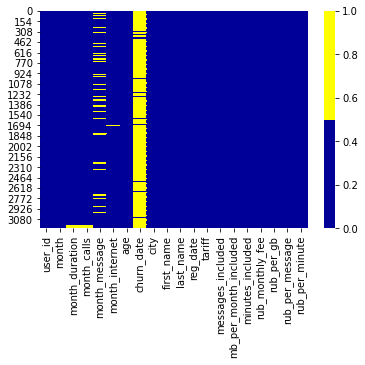

In [69]:
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours)) # желтый - пропущенные данные, синий - не пропущенные

In [70]:
df.duplicated().sum() #поиск дубликатов.

0

In [71]:
df.isna().sum().sort_values(ascending = False)

churn_date               3027
month_message             497
month_duration             40
month_calls                40
month_internet             11
user_id                     0
messages_included           0
rub_per_message             0
rub_per_gb                  0
rub_monthly_fee             0
minutes_included            0
mb_per_month_included       0
last_name                   0
tariff                      0
reg_date                    0
month                       0
first_name                  0
city                        0
age                         0
rub_per_minute              0
dtype: int64

In [72]:
round(df.isna().sum()/df.shape[0]*100).sort_values(ascending = False) 

churn_date               94.0
month_message            15.0
month_duration            1.0
month_calls               1.0
user_id                   0.0
tariff                    0.0
rub_per_message           0.0
rub_per_gb                0.0
rub_monthly_fee           0.0
minutes_included          0.0
mb_per_month_included     0.0
messages_included         0.0
last_name                 0.0
reg_date                  0.0
month                     0.0
first_name                0.0
city                      0.0
age                       0.0
month_internet            0.0
rub_per_minute            0.0
dtype: float64

Пропуски в колонках:
- churn_date — дата прекращения пользования тарифом выглядит не критично,т.к. 94% пользователей действующие.
- month_message - количество отправленных сообщений в месяц 15% означает,что сообщения не отправляли, что логично заменить на 0.
- month_duration - израсходованные минуты разговора в месяц 1% означает, что не разговаривали в этом месяце по телефону, что логино заменить на 0.
- month_calls - количество сделанных звонков в месяц 1% означает, что не звонили ни разу, что логично совпадает с колонкой month_duration.
- month_internet - объем израсходованного интернет-трафика в месяц, совсем малая чачть не пользовались вовсе интернетом, что также заменим на 0.

In [73]:
df['month_message'] = df['month_message'].fillna(0)

In [74]:
df['month_duration'] = df['month_duration'].fillna(0)

In [75]:
df['month_calls'] = df['month_calls'].fillna(0)

In [76]:
df['month_internet'] = df['month_internet'].fillna(0)

Проверяем что получилось:

In [77]:
df.isna().sum().sort_values(ascending = False)

churn_date               3027
user_id                     0
reg_date                    0
rub_per_message             0
rub_per_gb                  0
rub_monthly_fee             0
minutes_included            0
mb_per_month_included       0
messages_included           0
tariff                      0
last_name                   0
month                       0
first_name                  0
city                        0
age                         0
month_internet              0
month_message               0
month_calls                 0
month_duration              0
rub_per_minute              0
dtype: int64

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3214 non-null   int64         
 1   month                  3214 non-null   int64         
 2   month_duration         3214 non-null   float64       
 3   month_calls            3214 non-null   float64       
 4   month_message          3214 non-null   float64       
 5   month_internet         3214 non-null   float64       
 6   age                    3214 non-null   int64         
 7   churn_date             187 non-null    datetime64[ns]
 8   city                   3214 non-null   object        
 9   first_name             3214 non-null   object        
 10  last_name              3214 non-null   object        
 11  reg_date               3214 non-null   datetime64[ns]
 12  tariff                 3214 non-null   object        
 13  mes

In [79]:
df.head()

,user_id,month,month_duration,month_calls,month_message,month_internet,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,164.0,22.0,22.0,2253.49,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,187.0,43.0,60.0,23233.77,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,346.0,47.0,75.0,14003.64,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,418.0,52.0,81.0,14055.93,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,478.0,58.0,57.0,14568.91,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


Находим помесячную выручку с каждого пользователя:
- month_gain - общая выручка в месяц
- over_the_norm - перерасход

«Мегалайн» всегда округляет общую сумму веб-трафика в большую сторону.Переведем мбт в Гбт и округлим.

In [80]:
def over_the_norm(row):
    message_over = (row['month_message'] - row['messages_included']) * row['rub_per_message']
    minutes_over = (row['month_duration'] - row['minutes_included']) * row['rub_per_minute']
    internet_over = np.ceil((row['month_internet'] - row['mb_per_month_included'])/1024) * row['rub_per_gb']
    total = 0 
    total = 0
    for i in [message_over, minutes_over,  internet_over]:
        if i > 0:
            total += i
    return total

In [81]:
df['over_the_norm'] = df.apply(lambda x: over_the_norm(x), axis=1)

In [82]:
df['month_gain'] = df['over_the_norm'] + df['rub_monthly_fee']

In [83]:
df[df['month_gain']>df['rub_monthly_fee']]

,user_id,month,month_duration,month_calls,month_message,month_internet,age,churn_date,city,first_name,...,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,over_the_norm,month_gain
8,1001,11,444.0,59.0,0.0,18429.34,41,NaT,Москва,Иван,...,smart,50,15360,500,550,200,3,3,600.0,1150.0
11,1002,7,219.0,26.0,11.0,17580.10,59,NaT,Стерлитамак,Евгений,...,smart,50,15360,500,550,200,3,3,600.0,1150.0
12,1002,8,294.0,42.0,13.0,20319.26,59,NaT,Стерлитамак,Евгений,...,smart,50,15360,500,550,200,3,3,1000.0,1550.0
13,1002,9,217.0,36.0,4.0,16691.08,59,NaT,Стерлитамак,Евгений,...,smart,50,15360,500,550,200,3,3,400.0,950.0
15,1002,11,250.0,32.0,16.0,18587.28,59,NaT,Стерлитамак,Евгений,...,smart,50,15360,500,550,200,3,3,800.0,1350.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3201,1328,12,0.0,0.0,7.0,39419.73,44,NaT,Мурманск,Рауль,...,ultra,1000,30720,3000,1950,150,1,1,1350.0,3300.0
3209,1489,9,0.0,0.0,32.0,17206.30,35,NaT,Санкт-Петербург,Павел,...,smart,50,15360,500,550,200,3,3,400.0,950.0
3210,1489,10,0.0,0.0,21.0,19559.44,35,NaT,Санкт-Петербург,Павел,...,smart,50,15360,500,550,200,3,3,1000.0,1550.0
3211,1489,11,0.0,0.0,20.0,17491.56,35,NaT,Санкт-Петербург,Павел,...,smart,50,15360,500,550,200,3,3,600.0,1150.0


**Вывод**

В колонках были пропуски, которые были не критичны:
- 6 % не действующие абоненты
- 15 % клиентов не отправляют сообщения
- 1 % не пользуются сотовой звонками
- и всего малая часть - 0,3 % не пользуются интернетом


## Анализ данных

Опишем поведение клиентов оператора, исходя из выборки:
        
- сколько минут разговора требуется пользователям каждого тарифа в месяц;
- сколько сообщений требуется пользователям каждого тарифа в месяц;
- какой объём интернет-трафика требуется пользователям каждого тарифа в месяц.

Посчитаем среднее количество, дисперсию и стандартное отклонение.
    
Построим гистограммы. 

Опишем распределения.

In [84]:
df['tariff'].value_counts()

smart    2229
ultra     985
Name: tariff, dtype: int64

Описание тарифов:

Тариф «Смарт»:
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:
- минута разговора: 3 рубля
- сообщение: 3 рубля
- 1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»:
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:
- минута разговора: 1 рубль
- сообщение: 1 рубль
- 1 Гб интернет-трафика: 150 рублей

Рассмотрим общую выручку в разрезе тарифов smart и ультра

Посчитаем среднее количество, дисперсию и стандартное отклонение по:
- month_gain - общая выручка в месяц
- over_the_norm - перерасход

In [85]:
df.groupby('tariff').agg({'month_gain':['median','mean','var','std']}).style.format("{:.2f}")

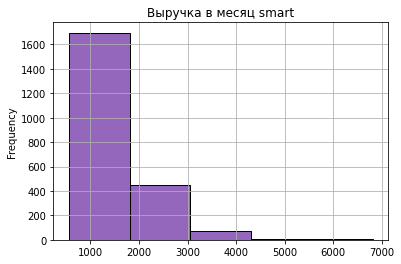

In [86]:
df[df['tariff'] == 'smart']['month_gain'].plot(grid=True,kind='hist', bins=5,edgecolor='black', color='tab:purple')
plt.title('Выручка в месяц smart')
plt.show()

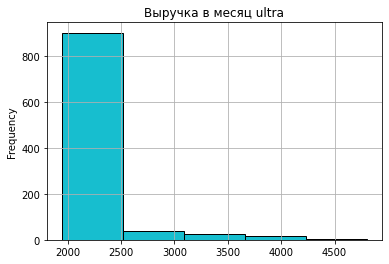

In [87]:
df[df['tariff'] == 'ultra']['month_gain'].plot(grid=True,kind='hist', bins=5,edgecolor='black', color='tab:cyan')
plt.title('Выручка в месяц ultra')
plt.show()

In [88]:
df['month_gain'].describe()

count    3214.000000
mean     1540.849409
std       801.291720
min       550.000000
25%       750.000000
50%      1689.000000
75%      1950.000000
max      6824.000000
Name: month_gain, dtype: float64

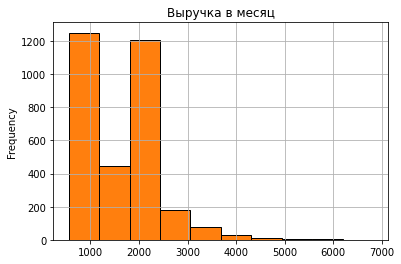

In [89]:
df['month_gain'].plot(grid=True,kind='hist', bins=10,edgecolor='black',color='tab:orange')
plt.title('Выручка в месяц')
plt.show()

In [90]:
df.groupby('tariff').agg({'over_the_norm':['median','mean','var','std']}).style.format("{:.2f}")

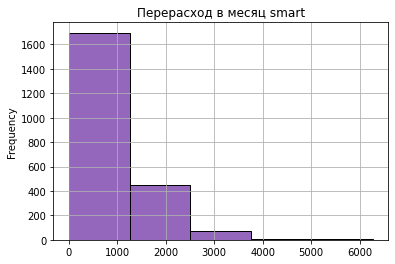

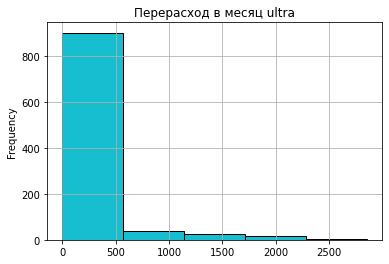

In [91]:
df[df['tariff'] == 'smart']['over_the_norm'].plot(grid=True,kind='hist', bins=5,edgecolor='black', color='tab:purple')
plt.title('Перерасход в месяц smart')
plt.show()
df[df['tariff'] == 'ultra']['over_the_norm'].plot(grid=True,kind='hist', bins=5,edgecolor='black', color='tab:cyan')
plt.title('Перерасход в месяц ultra')
plt.show()

In [92]:
df['over_the_norm'].describe()

count    3214.000000
mean      561.789048
std       777.459105
min         0.000000
25%         0.000000
50%       192.000000
75%       988.000000
max      6274.000000
Name: over_the_norm, dtype: float64

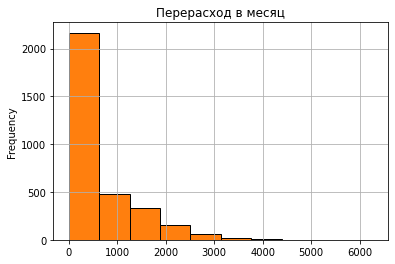

In [93]:
df['over_the_norm'].plot(grid=True,kind='hist', bins=10,edgecolor='black',color='tab:orange')
plt.title('Перерасход в месяц')
plt.show()

**Вывод:**

smart чаще выходят за пределы тарифа, ultra почти не перерасходуют лимиты по тарифам.

In [94]:
df.describe()

,user_id,month,month_duration,month_calls,month_message,month_internet,age,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,over_the_norm,month_gain
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,1251.590230,8.317362,463.570006,63.038892,38.281269,17207.612859,46.641568,341.148102,20067.405103,1266.179216,979.060361,184.676416,2.387057,2.387057,561.789048,1540.849409
std,144.659172,2.905413,247.918544,33.236368,36.148326,7570.958771,16.586109,438.044726,7082.491569,1152.749279,645.539596,23.054986,0.922199,0.922199,777.459105,801.291720
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,18.000000,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000,0.000000,550.000000
25%,1125.000000,6.000000,291.000000,40.000000,9.000000,12491.890000,32.000000,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000,0.000000,750.000000
50%,1253.000000,9.000000,456.000000,62.000000,30.000000,16943.175000,46.000000,50.000000,15360.000000,500.000000,550.000000,200.000000,3.000000,3.000000,192.000000,1689.000000
75%,1378.750000,11.000000,605.000000,82.000000,57.000000,21424.625000,62.000000,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000,988.000000,1950.000000
max,1499.000000,12.000000,1727.000000,244.000000,224.000000,49745.690000,75.000000,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000,6274.000000,6824.000000


### Сколько минут разговора требуется пользователям каждого тарифа в месяц

In [95]:
df.groupby('tariff').agg({'month_duration':['median','mean','var','std']}).style.format("{:.2f}")

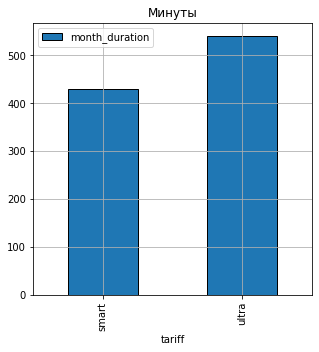

In [96]:
df.pivot_table(index='tariff', values='month_duration').plot(grid=True, figsize=(5, 5), kind = 'bar',edgecolor='black')
plt.title('Минуты')
plt.show()

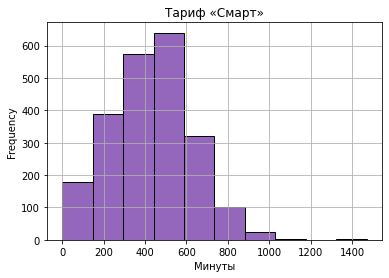

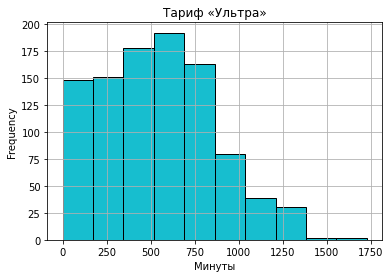

In [97]:
df[df['tariff'] == 'smart']['month_duration'].plot(grid=True,kind='hist', bins=10,edgecolor='black',color ='tab:purple')
plt.title('Тариф «Смарт»')
plt.xlabel('Минуты')
plt.show()
df[df['tariff'] == 'ultra']['month_duration'].plot(grid=True,kind='hist', bins=10,edgecolor='black', color='tab:cyan')
plt.title('Тариф «Ультра»')
plt.xlabel('Минуты')
plt.show()

In [98]:
df['month_duration'].describe()

count    3214.000000
mean      463.570006
std       247.918544
min         0.000000
25%       291.000000
50%       456.000000
75%       605.000000
max      1727.000000
Name: month_duration, dtype: float64

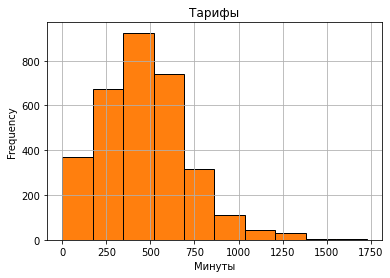

In [99]:
df['month_duration'].plot(grid=True,kind='hist', bins=10,edgecolor='black',color='tab:orange')
plt.title('Тарифы')
plt.xlabel('Минуты')
plt.show()

**Вывод:**

На smart в среднем говорят 435 минут (включено 500 минут разговора), на ultra 532 минуты (включено 3000 минут разговора). Из этого следует, что по минутам ни на одном из тарифов нет перерасхода,но клиенты smart близки к порогу перерасхода.

### Cколько сообщений требуется пользователям каждого тарифа в месяц

In [100]:
df.groupby('tariff').agg({'month_message':['median','mean','var','std']}).style.format("{:.2f}")

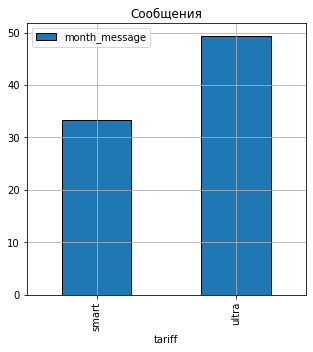

In [101]:
df.pivot_table(index='tariff', values='month_message').plot(grid=True, figsize=(5, 5), kind = 'bar',edgecolor='black')
plt.title('Сообщения')
plt.show()

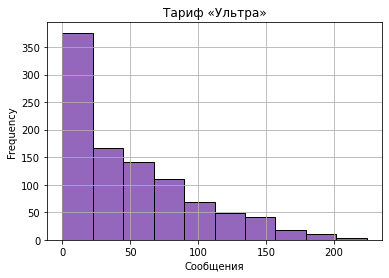

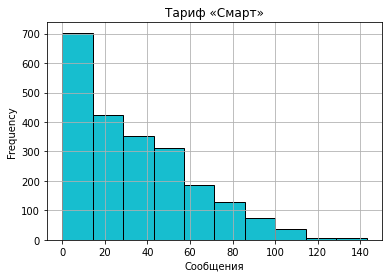

In [102]:
df[df['tariff'] == 'ultra']['month_message'].plot(grid=True,kind='hist', bins=10,edgecolor='black',color='tab:purple')
plt.title('Тариф «Ультра»')
plt.xlabel('Сообщения')
plt.show()
df[df['tariff'] == 'smart']['month_message'].plot(grid=True,kind='hist', bins=10,edgecolor='black',color='tab:cyan')
plt.title('Тариф «Смарт»')
plt.xlabel('Сообщения')
plt.show()

In [103]:
df['month_message'].describe()

count    3214.000000
mean       38.281269
std        36.148326
min         0.000000
25%         9.000000
50%        30.000000
75%        57.000000
max       224.000000
Name: month_message, dtype: float64

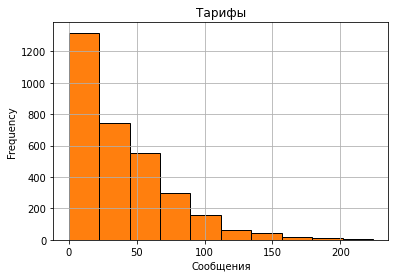

In [104]:
df['month_message'].plot(grid=True,kind='hist', bins=10,edgecolor='black',color='tab:orange')
plt.title('Тарифы')
plt.xlabel('Сообщения')
plt.show()

**Вывод:**

На smart в среднем тратят 28 сообщений (включено 50 сообщений), на ultra 38 сообщений  (включено 1000 сообщений). Из этого следует, что клиенты обоих тарифов почти не пользуются отправкой сообщений и далеки от перерасхода ссобщений.

### Какой объём интернет-трафика требуется пользователям каждого тарифа в месяц

In [105]:
df.groupby('tariff').agg({'month_internet':['median','mean','var','std']}).style.format("{:.2f}")

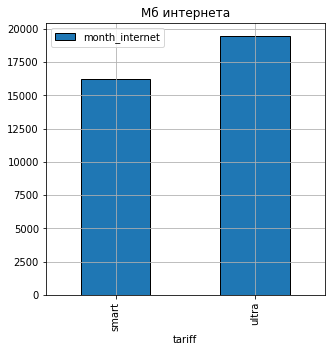

In [106]:
df.pivot_table(index='tariff', values='month_internet').plot(grid=True, figsize=(5, 5), kind = 'bar',edgecolor='black')
plt.title('Мб интернета')
plt.show()

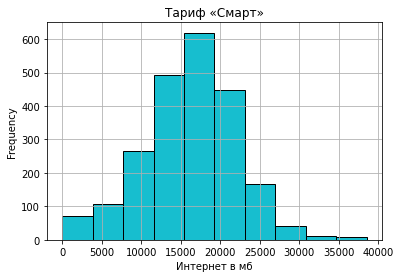

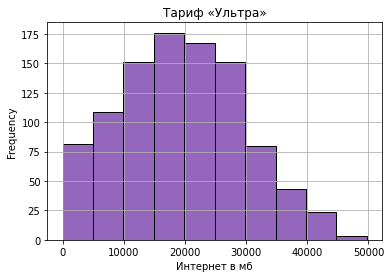

In [107]:
df[df['tariff'] == 'smart']['month_internet'].plot(grid=True, kind='hist', bins=10,edgecolor='black',color='tab:cyan')
plt.title('Тариф «Смарт»')
plt.xlabel('Интернет в мб')
plt.show()
df[df['tariff'] == 'ultra']['month_internet'].plot(grid=True,kind='hist', bins=10,edgecolor='black',color='tab:purple')
plt.title('Тариф «Ультра»')
plt.xlabel('Интернет в мб')
plt.show()

In [108]:
df['month_internet'].describe()

count     3214.000000
mean     17207.612859
std       7570.958771
min          0.000000
25%      12491.890000
50%      16943.175000
75%      21424.625000
max      49745.690000
Name: month_internet, dtype: float64

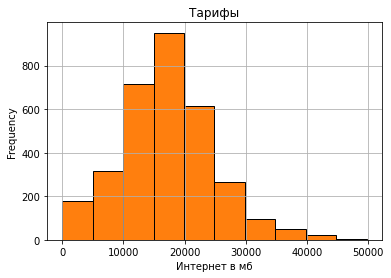

In [109]:
df['month_internet'].plot(grid=True,kind='hist', bins=10,edgecolor='black',color='tab:orange')
plt.title('Тарифы')
plt.xlabel('Интернет в мб')
plt.show()

**Вывод:**

На smart в среднем используют  16507 Мб (16 Гб) интернета (включено 15 Гб интернет-трафика), на ultra 19308 Мб (19 Гб) интернета (включено 30 Гб интернет-трафика). Из этого следует, что smart привышают лимит по интернету, а у ultra еще большой запас остается до границы лимита.

**Вывод:**
- Smart чаще выходят за пределы тарифа, ultra почти не перерасходуют лимиты по тарифам
- По минутам ни на одном из тарифов нет сильного перерасхода,но клиенты smart близки к порогу перерасхода.
- Клиенты обоих тарифов почти не пользуются отправкой сообщений и далеки от перерасхода сообщений.
- Все в равной степени любят пользоваться интернетом, т.к. smart привышают лимит по интернету, а у ultra еще большой запас остается до границы лимита.

## Проверьте гипотезы

-  Различаются ли средняя выручка пользователей тарифов «Ультра» и «Смарт» ;
-  Отличается ли средняя выручка пользователей из Москвы  от выручки пользователей из других регионов.

Поясним как  формулировали нулевую и альтернативную гипотезы и какой критерий использовали для проверки гипотез и почему.

### Различаются ли средняя выручка пользователей тарифов «Ультра» и «Смарт» 

Формулируем нулевую гипотезу H₀, исходя из H₀ формулируем альтернативную гипотезу H₁.Оно может звучать так: «Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается».
    

**Гипотеза**

H₀:Средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается

H₁:Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

In [110]:
ultra = df[df['tariff'] == 'ultra']

In [111]:
ultra = ultra['month_gain']

In [112]:
smart = df[df['tariff'] == 'smart']

In [113]:
smart = smart['month_gain']

In [114]:
alpha = .05 # критический уровень статистической значимости

In [115]:
results = st.ttest_ind(ultra, smart,equal_var = False)

In [116]:
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.7897104728368674e-238
Отвергаем нулевую гипотезу


**Вывод:**

Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

### Отличается ли средняя выручка пользователей из Москвы  от выручки пользователей из других регионов

**Гипотеза**

H₀:Средняя выручка пользователей из Москвы и из других регионов не отичается

H₁:Средняя выручка пользователей из Москвы и из других регионов отличается

In [117]:
df['city'].sort_values().unique() #смотрим уникальные значения в названии населённого пункта

array(['Архангельск', 'Астрахань', 'Балашиха', 'Барнаул', 'Белгород',
       'Брянск', 'Владивосток', 'Владикавказ', 'Владимир', 'Волгоград',
       'Волжский', 'Вологда', 'Воронеж', 'Грозный', 'Екатеринбург',
       'Иваново', 'Ижевск', 'Иркутск', 'Казань', 'Калининград', 'Калуга',
       'Кемерово', 'Киров', 'Кострома', 'Краснодар', 'Красноярск',
       'Курган', 'Курск', 'Липецк', 'Магнитогорск', 'Махачкала', 'Москва',
       'Мурманск', 'Набережные Челны', 'Нижневартовск', 'Нижний Новгород',
       'Нижний Тагил', 'Новокузнецк', 'Новороссийск', 'Новосибирск',
       'Омск', 'Оренбург', 'Орёл', 'Пенза', 'Пермь', 'Петрозаводск',
       'Подольск', 'Ростов-на-Дону', 'Рязань', 'Самара',
       'Санкт-Петербург', 'Саранск', 'Саратов', 'Севастополь', 'Смоленск',
       'Сочи', 'Ставрополь', 'Стерлитамак', 'Сургут', 'Тамбов', 'Тверь',
       'Тольятти', 'Томск', 'Тула', 'Тюмень', 'Улан-Удэ', 'Ульяновск',
       'Уфа', 'Хабаровск', 'Химки', 'Чебоксары', 'Челябинск', 'Череповец',
       'Чи

In [118]:
df['city'].value_counts(dropna=False).head(10) 

Москва             611
Санкт-Петербург    270
Новосибирск         98
Уфа                 95
Краснодар           86
Ульяновск           83
Казань              77
Омск                72
Пермь               68
Самара              67
Name: city, dtype: int64

In [119]:
len(df['city'].unique()) #считаем уникальные значения в названии населённого пункта

76

In [120]:
moscow = df[df['city'] == 'Москва']

In [121]:
moscow = moscow['month_gain']

In [122]:
region = df[df['city'] != 'Москва']

In [123]:
region = region['month_gain']

In [124]:
alpha = .05 # критический уровень статистической значимости

In [125]:
results = st.ttest_ind(moscow, region ,equal_var = False)

In [126]:
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5749090668370982
Не получилось отвергнуть нулевую гипотезу


**Вывод:**

Cредняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

## Общий вывод

- Пользователи  тарифа «Смарт» чаще выходят за пределы тарифа, пользователи тарифа «Ультра» почти не перерасходуют лимиты по тарифам.
- На тарифе «Смарт» в среднем говорят 435 минут (включено 500 минут разговора), на тарифе «Ультра» 532 минуты (включено 3000 минут разговора). Из этого следует, что по минутам ни на одном из тарифов нет перерасхода,но пользователи тарифа «Смарт» близки к порогу перерасхода.
- На тарифе «Смарт» в среднем используют 16507 Мб (16 Гб) интернета (включено 15 Гб интернет-трафика), на тарифе «Ультра» 19308 Мб (19 Гб) интернета (включено 30 Гб интернет-трафика). Из этого следует, что пользователи тарифа «Смарт» привышают лимит по интернету, а у пользователей тарифа «Ультра» еще большой запас остается до границы лимита.
- На тарифе «Смарт» в среднем тратят 28 сообщений (включено 50 сообщений), на тарифе «Ультра» 38 сообщений (включено 1000 сообщений). Из этого следует, что клиенты обоих тарифов почти не пользуются отправкой сообщений и далеки от перерасхода собщений.Сообщения не актуальны у обоих тарифов.
- Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.
- Выручка пользователей из Москвы и из других регионов существенно не отичается.
- Чаще всего перерасход происходит за счет пользования интернетом, затем за счет звонков и очень редко кто перерасходует сообщения, в основном на тарифе «Смарт».
- Пользователи разных тарифов «Смарт» и «Ультра» ведут себя по разному,т.к. каждый скорее всего выбирал себе тариф "по душе" и пользователи тарифа «Ультра» чаще всего далеки до пределов лимита, а пользователи «Смарт» немного перерасходуют установленный лимит.

**Вывод:**
Для пользователей тарифов «Смарт» и «Ультра» их тариф лучший, если нет альтернатив.

**Рекомендации:**
Рассмотреть для некоторых пользователей создание нового тарифа.Пример:

**Тариф «Стандарт»**

-  Ежемесячная плата: 1500 рублей
-  Включено 500 минут разговора, 50 сообщений и 20000 Мб интернет-трафика
-  Стоимость услуг сверх тарифного пакета:
-  минута разговора: 2,5 рубля
-  сообщение: 2,5 рубля
-  1 Гб интернет-трафика: 200 рублей



